# Cyclic Stationarity
Preparative chromatographic separations are operated in a repetitive fashion.
In particular processes that incorporate the recycling of streams, like steady-state-recycling (SSR) or simulated moving bed (SMB), have a distinct startup behavior that takes multiple cycles until a periodic steady state is reached.
But also in conventional batch chromatography several cycles are needed to attain stationarity in optimized situations where there is a cycle-to-cycle overlap of the elution profiles of consecutive injections.
However, it is not known beforehand how many cycles are required until cyclic stationarity is established.

For this reason, the `Simulator` can simulate a `ProcessModel` for a fixed number of cycles, or continue simulating until the `StationarityEvaluator` (see {ref}`Figure: Framework Overview <framework_overview>`) confirms that cyclic stationarity is reached.
Different criteria can be specified such as the maximum deviation of the concentration profiles or the peak areas of consecutive cycles {cite}`Holmqvist2015`.
The simulation terminates if the corresponding difference is smaller than a specified value.
For the evaluation of the process (see {ref}`fractionation_tutorial`), only the last cycle is examined, as it yields a representative `Performance` of the process in all later cycles.

## Demonstration
To demonstrate this concept, consider a SSR process (see {ref}`here <ssr_example>` for the full process configuration).

In [1]:
from examples.recycling.mrssr_process import process

A first strategy is to simulate multiple cycles at once.
For this purpose, we can specify `n_cycles` for the `ProcessSimulator`.

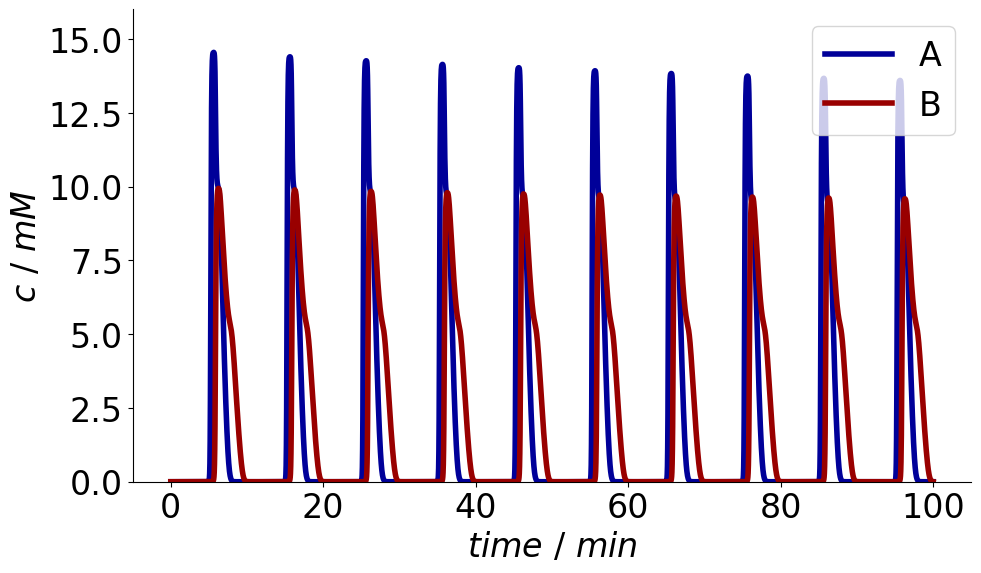

In [2]:
from CADETProcess.simulator import Cadet
process_simulator = Cadet()
process_simulator.n_cycles = 10
simulation_results = process_simulator.simulate(process)
_ = simulation_results.solution.column.outlet.plot()


However, it is hard to anticipate, when steady state is reached.
To automatically simulate until stationarity is reached, a `StationarityEvaluator` needs to be configured.

In [3]:
from CADETProcess.stationarity import StationarityEvaluator

evaluator = StationarityEvaluator()

In this example, the relative change in the area of the solution (i.e. the integral of the chromatogram) of succeeding cycles should be compared. 
For this purpose, a `RelativeArea` criterion is configured and added to the Evaluator.
The threshold is set to `1e-3` indicating that the change in area must be smaller than $0.1~\%$.

In [4]:
from CADETProcess.stationarity import RelativeArea

criterion = RelativeArea()
criterion.threshold = 1e-3

evaluator.add_criterion(criterion)

Then, the evaluator is added to the simulator and the `evaluate_stationarity` flag in the `Solver` is set to `True`.

In [5]:
process_simulator.stationarity_evaluator = evaluator
process_simulator.evaluate_stationarity = True

To prevent running too many simulations (e.g. when stationarity is never reached), it is possible to limit the maximum number of cycles that are evaluated:

In [6]:
process_simulator.n_cycles_max = 100

In addition, because stopping the simulation, evaluating the stationarity, and then restarting the simulation comes with some overhead, it is also possible to set a minimum number of cycles that are simulated between evaluations:

In [7]:
process_simulator.n_cycles_min = 10

Now the simulator runs until stationarity is reached.

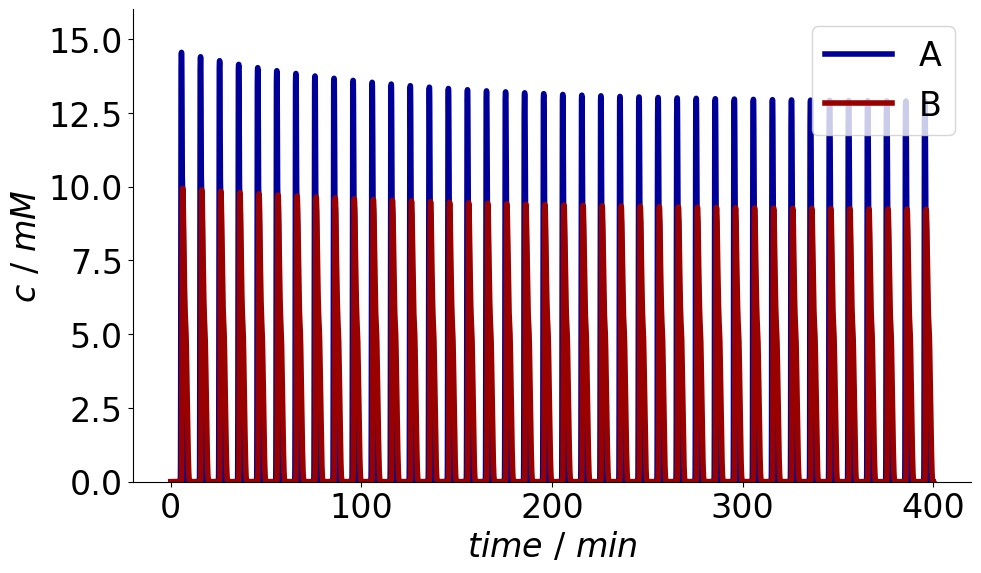

In [8]:
simulation_results = process_simulator.simulate(process)
_ = simulation_results.solution.column.outlet.plot()

Here, it ran for 50 cycles.

It is possible to access the solution of any of the cycles.
For the last cycle, use the index `-1`.

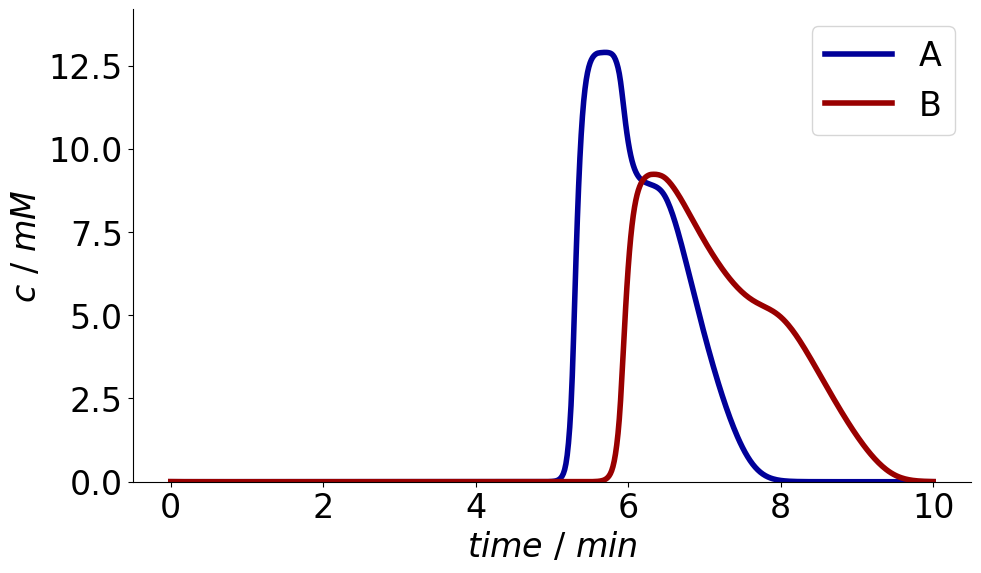

In [9]:
_ = simulation_results.solution_cycles.column.outlet[-1].plot()

Note that the simulator by default already contains a preconfigured `StationarityEvaluator`.
Usually, it is sufficient to only set the `evaluate_stationarity` flag.